In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Census ##

In [2]:
popfull = Table.read_table('nc-est2019-agesex-res.csv')
popfull.show(10)

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


Goal: Visualize 2019 US population (y-axis) as a function of age (x-axis) on a line plot.
Cleanup steps:
- Select all rows where SEX is 0 (this aggregates all sex categories)
- Throw away row where AGE is 999 (this row aggregates all age categories)
- Select just the AGE (x-axis) and POPESTIMATE2019 columns (y-axis)

In [3]:

pop2019 = popfull.where('SEX', 0).where('AGE', are.below(999)).select("AGE", "POPESTIMATE2019")
pop2019.show(10)

AGE,POPESTIMATE2019
0,3783052
1,3829599
2,3922044
3,3998665
4,4043323
5,4028281
6,4017227
7,4022319
8,4066194
9,4061874


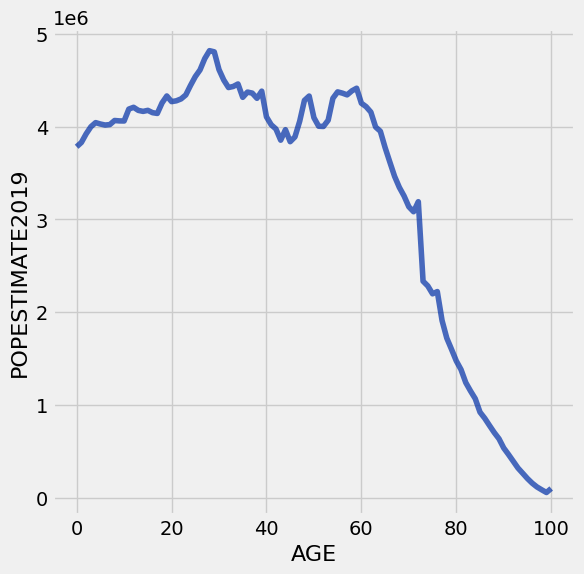

In [4]:
# First argument is the column for x-axis
# Second argument is the column for the y-axis
pop2019.plot('AGE', 'POPESTIMATE2019')

In [5]:
# Let's compare male and female counts per age
males2019 = popfull.where('SEX', 1).where('AGE', are.below(999)).select("AGE", "POPESTIMATE2019")
females2019 = popfull.where('SEX', 2).where('AGE', are.below(999)).select("AGE", "POPESTIMATE2019")
males2019.show(3)
females2019.show(3)

AGE,POPESTIMATE2019
0,1935117
1,1958585
2,2005544


AGE,POPESTIMATE2019
0,1847935
1,1871014
2,1916500


In [6]:
# Put everything in one table to plot
# Table() creates a blank table with no data
# with_columns adds the requested columns
pop_2019_mf = Table().with_columns(
    'Age', males2019.column('AGE'),
    'Males', males2019.column('POPESTIMATE2019'),
    'Females', females2019.column('POPESTIMATE2019')
)
pop_2019.show(5)

NameError: name 'pop_2019' is not defined

In [ ]:
# If only one argument is provided, all other columns are assumed to be y-axis data for separate plots
pop_2019.plot('Age')

# Practice
Create a line plot where
* x-axis is age
* y-axis is the percent of people that age registered as female (e.g., the value corresponding to age 0 should be 1847935 / (1847935 + 1935117) * 100)

In [ ]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think

# PLOT GOES HERE
plots.ylim(0, 100);  # Optional for Data 8

## Scatter Plots ##

In [ ]:
# Actors and their highest grossing movies
actors = Table.read_table('actors.csv')
actors

In [ ]:
# First argument is x-axis, second argument is y-axis
actors.scatter('Number of Movies', 'Total Gross')

In [ ]:
actors.scatter('Number of Movies', 'Average per Movie')

# Practice
Create a scatter plot where
* x-axis is number of movies
* y-axis is the percent each actor's #1 movie represents as a percent of their total gross (e.g., the value corresponding to Harrison Ford should be 936.7 / 4871.7 * 100)